# Web Scraping Skipass Prices with Python and Beautifulsoup

Data from: https://www.skiinfo.de/schweiz/skipaesse

## Libraries and settings

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

## Web Scraper Skipass Data

In [2]:
# Option (1): Send an HTTP request to the URL (gets first 50 ski resorts)
# url = 'https://www.skiinfo.de/schweiz/skipaesse'
# response = requests.get(url)
# html_content = response.content

# Option (2): Read html from file (gets all ski resorts)
# Read html from file
with open('./data/skipass.html', 'r') as file:
    html_content = file.read()

# Parse the HTML content
soup = BeautifulSoup(html_content, 'html.parser')

# Locate the table and extract values
table = soup.find('table')

# Extract table headers
headers = [header.get_text().replace('\xa0', '') for header in table.find_all('th')]

# Extract table rows
rows = []
for row in table.find_all('tr')[1:]:
    cells = row.find_all('td')
    row_data = [cell.get_text().replace('\xa0', '').strip() for cell in cells]
    rows.append(row_data)

# Create a DataFrame
df = pd.DataFrame(rows, columns=headers)

import pandas as pd

# Change column names
df.columns = [
    'ski_resort', 
    'season_ticket_adults', 
    'season_ticket_children', 
    'day_ticket_adults',
    'day_ticket_children',
    'buy_online'
]

# Show DataFrame dimensions
print('Number of rows and columns:', df.shape)

# Show data types of the columns
print('\nData types of the columns:\n', df.dtypes)

# Change data types and remove special characters
df['season_ticket_adults'] = pd.to_numeric(df['season_ticket_adults'].str.replace(',', ''), errors='coerce')
df['season_ticket_children'] = pd.to_numeric(df['season_ticket_children'].str.replace(',', ''), errors='coerce')
df['day_ticket_adults'] = pd.to_numeric(df['day_ticket_adults'].str.replace(',', ''), errors='coerce')
df['day_ticket_children'] = pd.to_numeric(df['day_ticket_children'].str.replace(',', ''), errors='coerce')

# Show the first few rows
df.head(10)

Number of rows and columns: (149, 6)

Data types of the columns:
 ski_resort                object
season_ticket_adults      object
season_ticket_children    object
day_ticket_adults         object
day_ticket_children       object
buy_online                object
dtype: object


,ski_resort,season_ticket_adults,season_ticket_children,day_ticket_adults,day_ticket_children,buy_online
0,Adelboden,1110.0,475.0,NaN,NaN,
1,Aeschi - Aeschiried,260.0,160.0,33.0,23.0,
2,Airolo,1130.0,495.0,NaN,NaN,
3,Amden - Arvenbüel,390.0,260.0,35.0,22.0,
4,Andermatt,1119.0,559.0,89.0,45.0,
5,Anzère,899.0,399.0,63.0,38.0,
6,Arolla,899.0,399.0,40.0,NaN,
7,Arosa Lenzerheide,1550.0,545.0,89.0,29.0,
8,Atzmännig Goldingen,390.0,249.0,35.0,25.0,
9,Avers,315.0,190.0,32.0,20.0,


## Summary Statistics

In [3]:
# Summary statistics
df.describe()

,season_ticket_adults,season_ticket_children,day_ticket_adults,day_ticket_children
count,148.000000,137.000000,138.000000,135.000000
mean,730.574324,314.905109,49.761594,27.442222
std,971.157057,145.025702,18.170576,9.968072
min,1.000000,0.000000,20.000000,0.000000
25%,341.500000,204.000000,35.000000,22.000000
50%,575.000000,300.000000,44.000000,26.000000
75%,899.000000,399.000000,62.750000,31.000000
max,11449.000000,875.000000,95.000000,55.000000


## Histogram of Skipass Prices

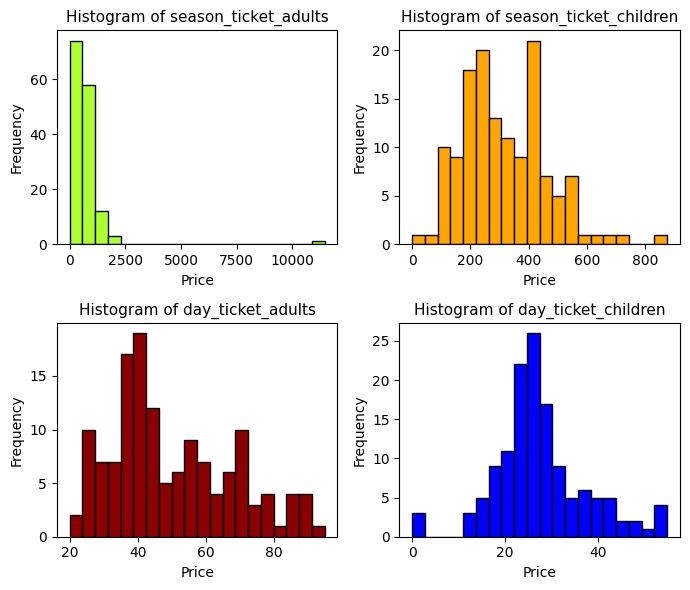

In [4]:
# Histograms
fig, axes = plt.subplots(2, 2, figsize=(7, 6))

df['season_ticket_adults'].plot(
    kind='hist',
    bins=20,
    edgecolor='black',
    color='greenyellow', 
    ax=axes[0, 0]
)
axes[0, 0].set_title('Histogram of season_ticket_adults', fontsize=11)
axes[0, 0].set_xlabel('Price')
axes[0, 0].set_ylabel('Frequency')

df['season_ticket_children'].plot(
    kind='hist', 
    bins=20,
    edgecolor='black',
    color='orange',  
    ax=axes[0, 1]
)
axes[0, 1].set_title('Histogram of season_ticket_children', fontsize=11)
axes[0, 1].set_xlabel('Price')
axes[0, 1].set_ylabel('Frequency')

df['day_ticket_adults'].plot(
    kind='hist', 
    bins=20,
    edgecolor='black',
    color='darkred', 
    ax=axes[1, 0]
)
axes[1, 0].set_title('Histogram of day_ticket_adults', fontsize=11)
axes[1, 0].set_xlabel('Price')
axes[1, 0].set_ylabel('Frequency')

df['day_ticket_children'].plot(
    kind='hist', 
    bins=20,
    edgecolor='black',
    color='blue', 
    ax=axes[1, 1]
)
axes[1, 1].set_title('Histogram of day_ticket_children', fontsize=11)
axes[1, 1].set_xlabel('Price')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [5]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.8.0-1021-azure
Datetime: 2025-03-23 17:56:23
Python Version: 3.11.11
-----------------------------------
